<a href="https://colab.research.google.com/github/metsumesquita/kaggle-colab-jupyter/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importar módulos necessários:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

### 2. Importar a base de dados "Train.csv":

In [ ]:
# Importar a base de dados, deixando no formato de dataframe
dados = pd.read_csv("Train.csv")

In [ ]:
# Visualizar 5 primeiras linhas
dados.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
# Verificar se existem dados faltantes em todas as variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
# Remover colunas que não serão utilizadas e valores faltantes
dados.drop(columns=['ID', 'Var_1'], inplace=True)
dados.dropna(inplace=True)

### 3. Tratar os dados:

Os dados precisam ser tratados para que possam ser utilizados pelo algoritmo de ML;

O algoritmo de ML aceita apenas números como entrada.

In [ ]:
# Fazer uma cópia do dataframe para a modificação
dadosML = dados.copy()

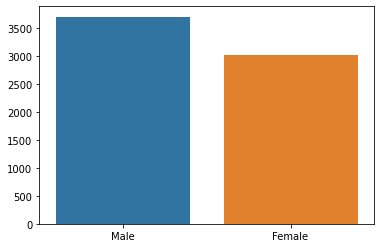

In [ ]:
# Identificar quais as categorias da coluna 'Gender'.
genero = dadosML['Gender'].value_counts()

plt.figure()
sns.barplot(x=genero.keys(), y=genero.values)
plt.show()

In [ ]:
# A coluna apresenta apenas dois valores distintos. Neste caso, podemos apenas
# substituí-los por 0 e 1.
dadosML['Gender'].replace('Male', 0, inplace=True)
dadosML['Gender'].replace('Female', 1, inplace=True)

In [ ]:
# Resultado
dadosML.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0,No,22,No,Healthcare,1.0,Low,4.0,D
2,1,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,0,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,0,Yes,56,No,Artist,0.0,Average,2.0,C
6,0,No,32,Yes,Healthcare,1.0,Low,3.0,C


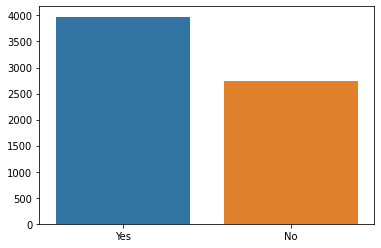

In [ ]:
# Identificar quais as categorias da coluna 'Ever_Married'.
jacasou = dadosML['Ever_Married'].value_counts()

plt.figure()
sns.barplot(x=jacasou.keys(), y=jacasou.values)
plt.show()

In [ ]:
# Assim como no caso anterior, a coluna apresenta apenas dois valores distintos.
# Também podemos apenas substituí-los por 0 e 1.
dadosML['Ever_Married'].replace('No', 0, inplace=True)
dadosML['Ever_Married'].replace('Yes', 1, inplace=True)

In [ ]:
# Resultado
dadosML.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0,0,22,No,Healthcare,1.0,Low,4.0,D
2,1,1,67,Yes,Engineer,1.0,Low,1.0,B
3,0,1,67,Yes,Lawyer,0.0,High,2.0,B
5,0,1,56,No,Artist,0.0,Average,2.0,C
6,0,0,32,Yes,Healthcare,1.0,Low,3.0,C


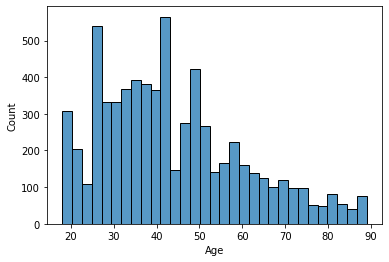

In [ ]:
# A variável idade é uma "distribuição". No momento não precisamos mexer nela.
plt.figure()
sns.histplot(data=dadosML, x="Age")
plt.show()

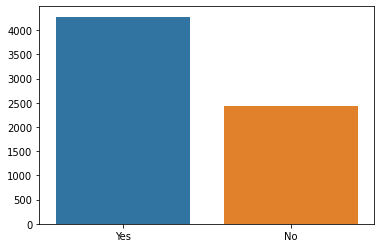

In [ ]:
# Identificar quais as categorias da coluna 'Ever_Married'.
graduado = dadosML['Graduated'].value_counts()

plt.figure()
sns.barplot(x=graduado.keys(), y=graduado.values)
plt.show()

In [ ]:
# Assim como em casos anteriores, a coluna apresenta apenas dois valores distintos.
# Também podemos apenas substituí-los por 0 e 1.
dadosML['Graduated'].replace('No', 0, inplace=True)
dadosML['Graduated'].replace('Yes', 1, inplace=True)

In [ ]:
# Resultado
dadosML.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0,0,22,0,Healthcare,1.0,Low,4.0,D
2,1,1,67,1,Engineer,1.0,Low,1.0,B
3,0,1,67,1,Lawyer,0.0,High,2.0,B
5,0,1,56,0,Artist,0.0,Average,2.0,C
6,0,0,32,1,Healthcare,1.0,Low,3.0,C


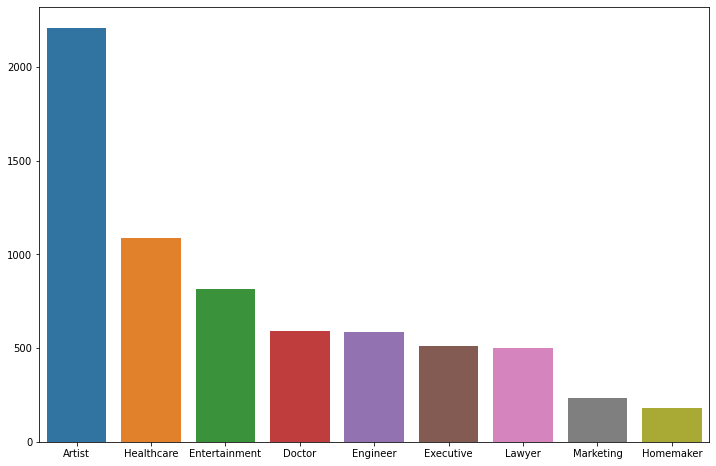

In [ ]:
# Identificar quais as categorias da coluna 'Profession'.
profissoes = dadosML['Profession'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=profissoes.keys(), y=profissoes.values)
plt.show()

Podemos observar que existem mais de 2 categorias;

Neste cenário, substituir por 0s e 1s não é viável;

Uma possível solução envolve o uso de one-hot enconding, mas isso será visto mais para frente;

Obs: Somente usar o one-hot encoding nem sempre é viável (Principalmente quando existem muitas categorias).

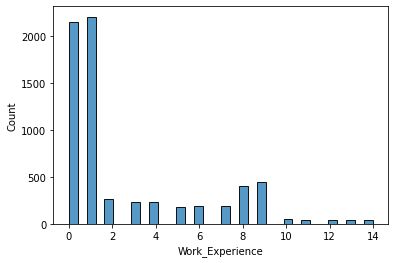

In [ ]:
# Assim como idade, a variável "Work experience" é uma "distribuição". No momento também não precisamos mexer nela.
plt.figure()
sns.histplot(data=dadosML, x="Work_Experience")
plt.show()

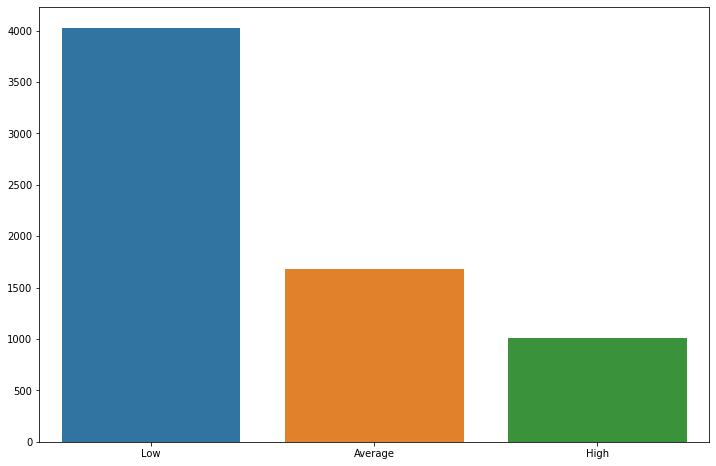

In [ ]:
# Identificar quais as categorias da coluna 'Spending_Score'.
ss = dadosML['Spending_Score'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=ss.keys(), y=ss.values)
plt.show()

Aqui também existem mais de 2 categorias;

Também vamos usar one-hot enconding, mas não agora.

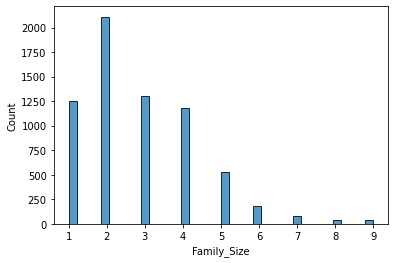

In [ ]:
# Assim como idade e experiência de trabalho, os dados da coluna Family_Size também podem ser vistos como uma "distribuição". No momento também não precisamos mexer nela.
plt.figure()
sns.histplot(data=dadosML, x="Family_Size")
plt.show()

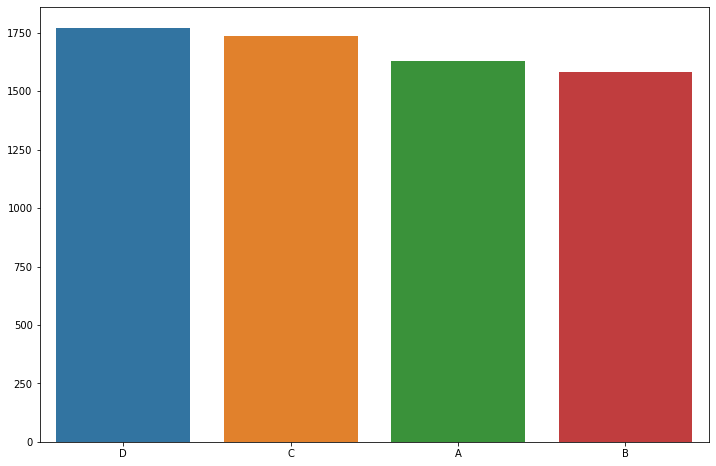

In [ ]:
# Por fim, identificamos quais as classes da coluna 'Segmentation' (Rótulos)
ss = dadosML['Segmentation'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=ss.keys(), y=ss.values)
plt.show()

Aqui também existem mais de 2 categorias;

Como estes são rótulos, não vamos utilizar o one-hot encoding.

In [ ]:
# Como mencionado anteriormente, vamos utilizar o one-hot encoding para resolver a questão das variáveis categóricas
dadosML = pd.get_dummies(dadosML.drop(columns=['Segmentation']))
dadosML['Segmentation'] = dados['Segmentation']

In [ ]:
# Resultado
dadosML.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Segmentation
0,0,0,22,0,1.0,4.0,0,0,0,0,0,1,0,0,0,0,0,1,D
2,1,1,67,1,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,1,B
3,0,1,67,1,0.0,2.0,0,0,0,0,0,0,0,1,0,0,1,0,B
5,0,1,56,0,0.0,2.0,1,0,0,0,0,0,0,0,0,1,0,0,C
6,0,0,32,1,1.0,3.0,0,0,0,0,0,1,0,0,0,0,0,1,C


In [ ]:
# Agora precisamos normalizar as distribuições ('Age', 'Work_Experience', etc.)
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(dadosML.drop(columns=['Segmentation']))
dadosML.iloc[:,:-1] = scaled_values

In [ ]:
# Resultado
dadosML.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Segmentation
0,0.0,0.0,0.056338,0.0,0.071429,0.375,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,D
2,1.0,1.0,0.690141,1.0,0.071429,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,B
3,0.0,1.0,0.690141,1.0,0.000000,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,B
5,0.0,1.0,0.535211,0.0,0.000000,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,C
6,0.0,0.0,0.197183,1.0,0.071429,0.250,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,C
